# Data Source
1. old dataset used below.
https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry
2. new dataset not used.
https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("sf-03-18.csv") # old dataset
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,11087941463010,110879414,63010,WARRANTS,WARRANT ARREST,Friday,07/01/2011,08:00,NORTHERN,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,17.0
1,5117770316010,51177703,16010,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Tuesday,10/18/2005,14:30,TENDERLOIN,"ARREST, BOOKED",...,3.0,1.0,3.0,6.0,2.0,1.0,1.0,1.0,39.0,21.0
2,5011209707055,50112097,7055,VEHICLE THEFT,RECOVERED VEHICLE - STOLEN OUTSIDE SF,Saturday,01/29/2005,13:45,BAYVIEW,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,86.0
3,11044468164020,110444681,64020,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,06/02/2011,02:52,CENTRAL,PSYCHOPATHIC CASE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,107.0
4,3038311107024,30383111,7024,VEHICLE THEFT,STOLEN TRAILER,Saturday,02/01/2003,08:00,BAYVIEW,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,86.0


In [3]:
df.keys()

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

# Q1 question:
Count the number of crimes for different category.

In [4]:
q1_ans = df['Category'].value_counts()
q1_ans

LARCENY/THEFT                  477975
OTHER OFFENSES                 303027
NON-CRIMINAL                   236937
ASSAULT                        191384
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117875
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79740
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
SEX OFFENSES, FORCIBLE          10876
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4966
LIQUOR LAWS                      3941
ARSON       

<AxesSubplot:>

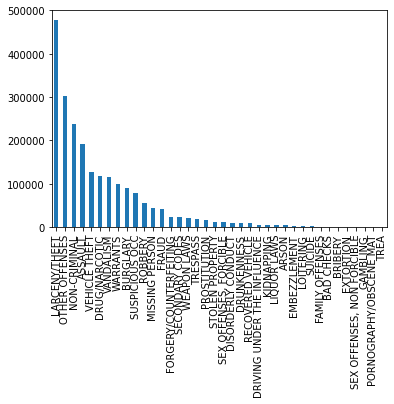

In [5]:
q1_ans.plot(kind='bar')

# Q2 question
Counts the number of crimes for different district, and visualize your results

In [6]:
q2_ans = df['PdDistrict'].value_counts()
q2_ans

SOUTHERN      394234
MISSION       293072
NORTHERN      269229
CENTRAL       223962
BAYVIEW       210729
TENDERLOIN    189034
INGLESIDE     186645
TARAVAL       158710
PARK          121070
RICHMOND      114267
Name: PdDistrict, dtype: int64

<AxesSubplot:>

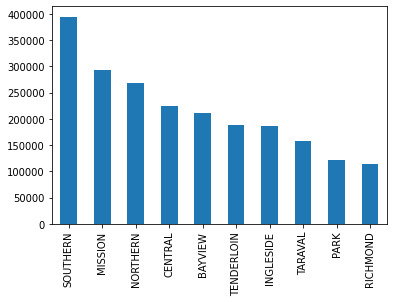

In [7]:
q2_ans.plot(kind='bar')

# Q3 question
Count the number of crimes each "Sunday" at "SF downtown".

In [8]:
"""
The center of downtown area is 37.779413, -122.418153
Use a circle to define the whole area, and 37.782178, -122.417638 is on the border of the circle
So radius^2 is 7.9
"""

q3_ans = df[df['DayOfWeek'] == 'Sunday']
q3_ans = q3_ans[((df['Y']-37.779413)**2 + (df['X']+122.418153)**2) <= 7.9]
q3_ans = q3_ans['Date'].value_counts()
pd.DataFrame(q3_ans)

<ipython-input-8-6bfac2e05cf8>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3_ans = q3_ans[((df['Y']-37.779413)**2 + (df['X']+122.418153)**2) <= 7.9]


,Date
01/01/2006,615
06/28/2015,592
06/25/2017,545
01/01/2012,519
11/01/2015,517
...,...
12/25/2016,226
12/25/2005,218
12/25/2011,166
05/13/2018,151


# Q4 question
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

# Ans:
There's a downtrend in number of crimes from 2015 to 2018. I believe the government were putting more efforts.

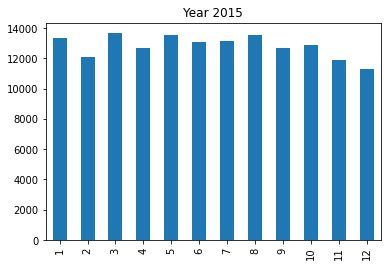

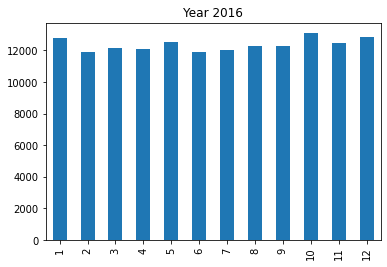

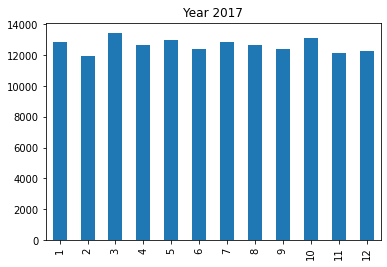

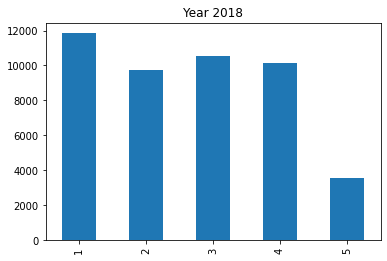

In [9]:
q4_ans = df['Date'][pd.DatetimeIndex(df['Date']).year >= 2015]
q4_ans = pd.DatetimeIndex(q4_ans)
for i in [2015, 2016, 2017, 2018]:
    q4_ans[q4_ans.year == i].month.value_counts().sort_index().plot(kind = 'bar')
    plt.title("Year "+str(i))
    plt.show()

# Q5 question
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

# Ans:
From the bar chart we could see there are 3 peaks, 12 oclock, 18 oclock, 0 oclock. Hence, these hours are not recommend for visiting SF.

<AxesSubplot:>

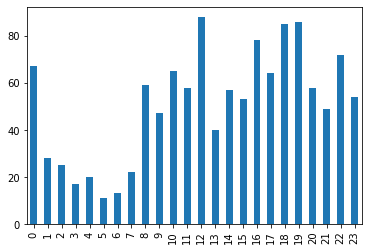

In [10]:
q5_ans = df[['Date', 'Time']][pd.DatetimeIndex(df['Date']).year >= 2015]
q5_ans = q5_ans[pd.DatetimeIndex(q5_ans['Date']).month == 12]
q5_ans = q5_ans[pd.DatetimeIndex(q5_ans['Date']).day == 15]
q5_ans['Time'] = pd.to_datetime(q5_ans['Time'], format='%H:%M').dt.hour
q5_ans['Time'].value_counts().sort_index().plot(kind = 'bar')

# Q6 question 
(1) Step1: Find out the top-3 danger disrict
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1
(3) give your advice to distribute the police based on your analysis results.

# Ans:
The top 3 danger districts are SOUTHERN, MISSION, NORTHERN. From the plots we could see around 5 am the crime rate is the lowest, and the peak crime rate is around 5 pm.Among all the categories, police should pay more attention to theft because it's not only the #1 crime category but also high frequency crime from 12 pm to 12 am. 

SOUTHERN    394234
MISSION     293072
NORTHERN    269229
Name: PdDistrict, dtype: int64


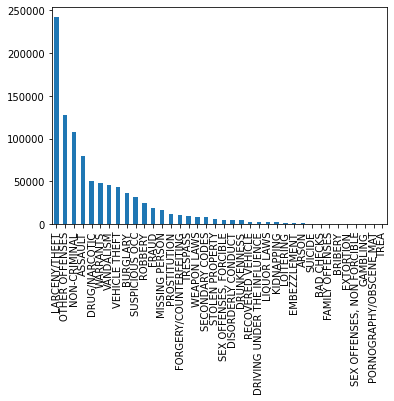

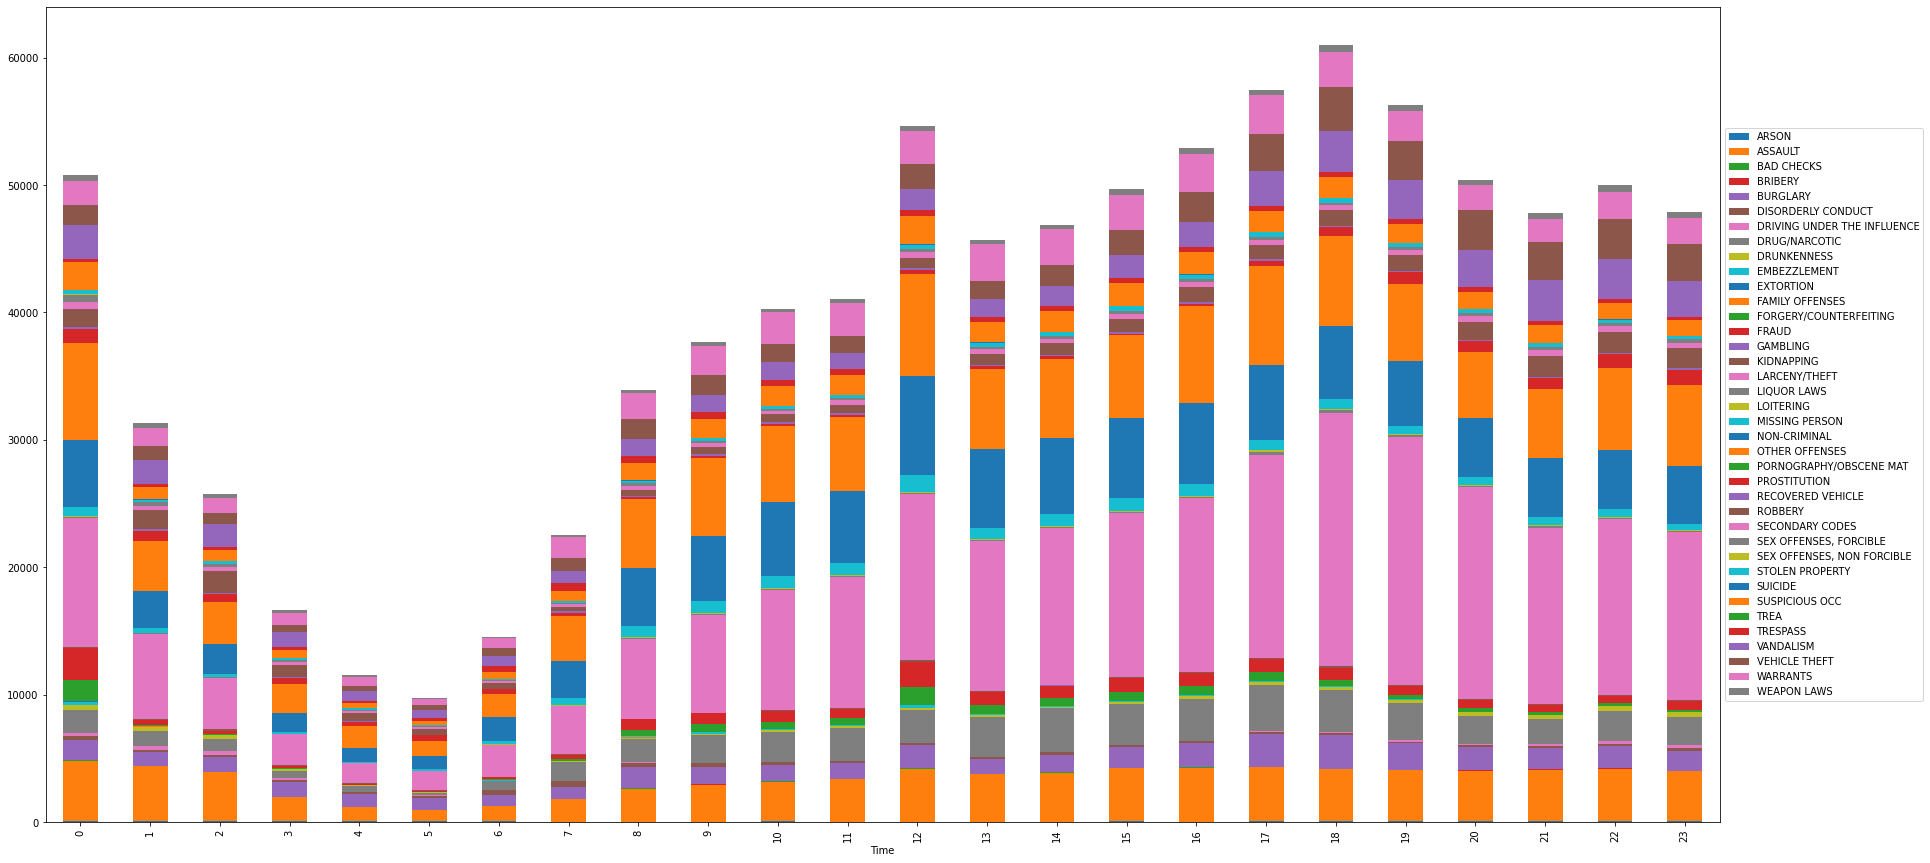

In [11]:
# Step1
q6_ans_1 = q2_ans.head(3)
print(q6_ans_1)

# Step2
q6_df = df[['Category', 'PdDistrict', 'Time']]
q6_df = q6_df[q6_df['PdDistrict'].isin(q6_ans_1.index)]
q6_df['Time'] = pd.to_datetime(q6_df['Time'], format='%H:%M').dt.hour

q6_df['Category'].value_counts().plot(kind='bar')
plt.show()

table = q6_df.pivot_table(index='Time', columns='Category', aggfunc='size')
table.plot(kind='bar', stacked=True, figsize=(30,15))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Q7 question 
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

# Ans:
From the top 10 category, we observe that most of these categories are None which means unclear or not resolved. For future concern, the laws and policies in these categories should be more complete because of their high occurrence.

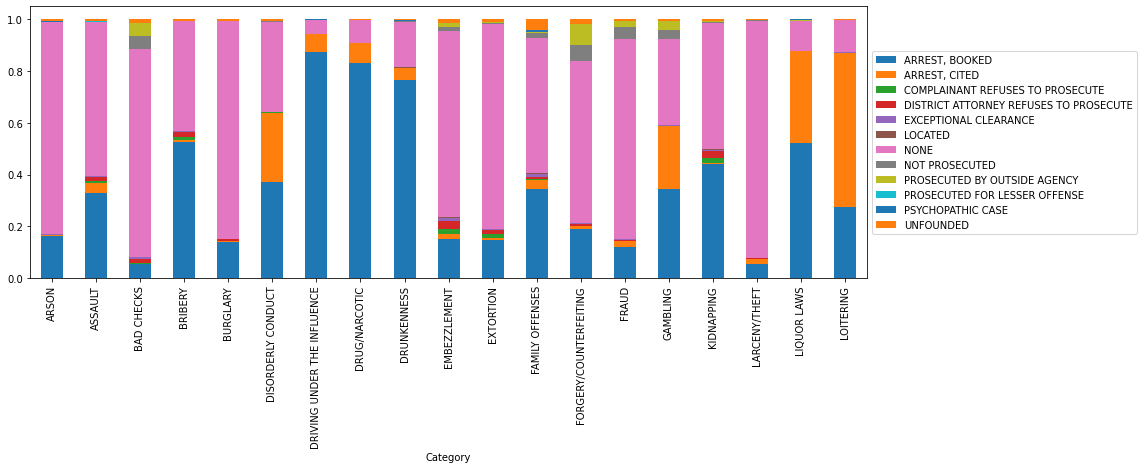

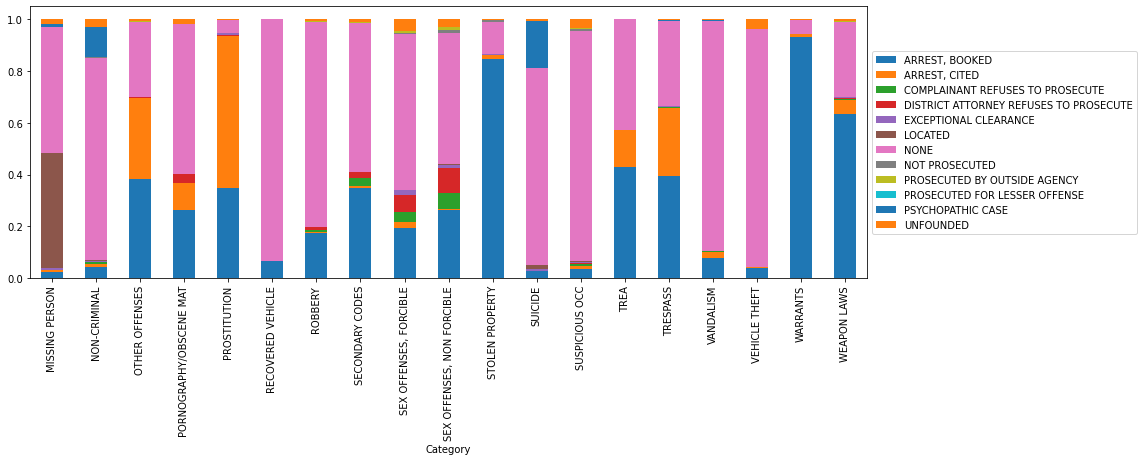

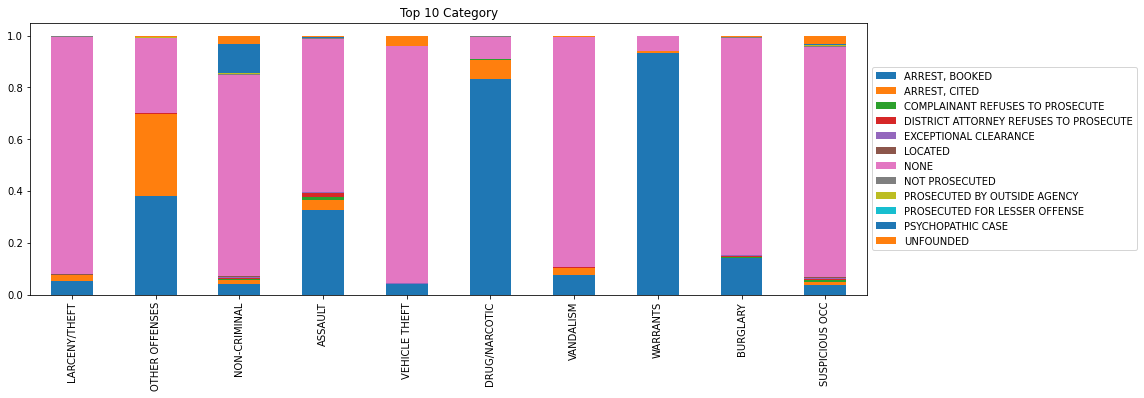

In [12]:
q7_df = df[['Category', 'Resolution']]

table = q7_df.pivot_table(index='Category', columns='Resolution', aggfunc='size')
table = table.div(table.sum(axis=1), axis=0)

for i in np.array_split(table.index, 2):
    table.loc[i].plot(kind='bar', stacked=True, figsize=(15, 5))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
    
table.loc[q1_ans.index[:10]].plot(kind='bar', stacked=True, figsize=(15, 5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Top 10 Category")
plt.show()

# Conclusion.
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big data analysis.
Point 1: what is your story ? and why you do this work ?
Point 2: how can you do it ? keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,
Point 3: what do you learn from the data ? keywords: crime, trend, advising, conclusion, runtime

# Optional part: Clustering
You can apply Spark ML custering algorithm to cluster the spatial data, then visualize the clustering results. Do not do this until you understand Spark ML, we would like to cover this in the DS track.

# Optional part: Time series analysis
This part is not based on Spark, and only based on Pandas Time Series package.
Note: I am not familiar with time series model, please refer the ARIMA model introduced by other teacher.
process:
1.visualize time series
2.plot ACF and find optimal parameter
3.Train ARIMA
4.Prediction

Refer:
https://zhuanlan.zhihu.com/p/35282988
https://zhuanlan.zhihu.com/p/35128342
https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html
https://www.howtoing.com/a-guide-to-time-series-forecasting-with-arima-in-python-3
https://www.joinquant.com/post/9576?tag=algorithm
https://blog.csdn.net/u012052268/article/details/79452244

# How to implement a inner join/ left join/right join via Python? (Optional)
For example

Array 1: [[1, "mike", "f"], [2, "jason", "f"], [3, "robin", "m"], ...]

Array 2: [[1, "95051", "CS"], [2, "95001", "DS"], [6, "robin", "DE"], ...]